# Breast Cancer Classification System with Neural Network

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('/content/breast_cancer.csv')

In [31]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [33]:
df['label'].value_counts()

,count
label,
1,357
0,212


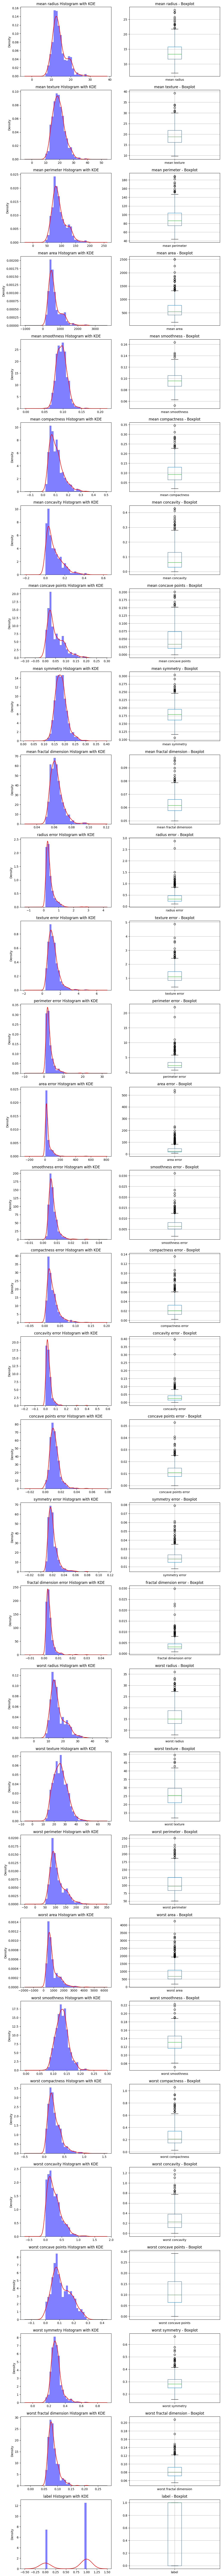

In [34]:

# Sample data creation
np.random.seed(0)

# Plotting Histogram with KDE and Boxplot for each numerical feature
c=df.select_dtypes(include=['int64','float64'])
fig, axes = plt.subplots(len(c.columns), 2, figsize=(12, 5 * len(c.columns)))

for i, col in enumerate(c.columns):
    try:
        df[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
        df[col].plot(kind='kde', ax=axes[i, 0], color='red')

        axes[i, 0].set_title(f'{col} Histogram with KDE')
        df.boxplot(column=col, ax=axes[i, 1])
        axes[i, 1].set_title(f'{col} - Boxplot')

    except IndexError:
      print(f"Error: Could not create plots for column '{col}'")
      break
    except Exception as e:
      print(f"An error occurred while plotting '{col}': {e}")
      continue

In [35]:
x=df.drop('label',axis=1)
y=df['label']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
# Define the model
model = Sequential()

# Input layer
model.add(Input(shape=(30,)))

# First hidden layer
model.add(Dense(60, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 60)                  │           1,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
X_train.shape


(455, 30)

In [40]:
# Train the model
m = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6762 - loss: 1.4980 - val_accuracy: 0.7363 - val_loss: 0.7208
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7985 - loss: 0.7825 - val_accuracy: 0.8242 - val_loss: 0.3968
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8920 - loss: 0.3445 - val_accuracy: 0.9011 - val_loss: 0.3127
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9293 - loss: 0.1981 - val_accuracy: 0.9121 - val_loss: 0.2957
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9203 - loss: 0.2541 - val_accuracy: 0.9121 - val_loss: 0.1797
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9091 - loss: 0.2728 - val_accuracy: 0.8462 - val_loss: 0.6152
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9372 - loss: 0.2887 - val_accuracy: 0.8571 - val_loss: 0.4042
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8971 - loss: 0.3351 - val_accuracy: 0.7802 - v

In [42]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9578 - loss: 0.0615 
Test Accuracy: 0.96
